# Combinatorial Optimization

In [1]:
from heuristic.trainNetwork import TrainNetwork
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import traceback
from typing import List,Dict
from random import shuffle

# Heuristic Search

In [2]:
trainNetwork = TrainNetwork()
trainNetwork.load("./heuristic/trainNetwork.save.json")
trainNetwork.breadthFirstSearch("PY16","PY37")

loaded edges and vertices


{'res': {'explored': ['PY16',
   'PY15',
   'PY17',
   'PY14',
   'PY18',
   'AG3',
   'SP3',
   'PY13',
   'PY19',
   'AG2',
   'AG4',
   'SP2',
   'SP4',
   'PY12',
   'PY20',
   'AG1',
   'AG5',
   'SP1',
   'SP5',
   'PY11',
   'PY21',
   'KJ9',
   'AG6',
   'SP6',
   'PY10',
   'PY22',
   'KJ8',
   'KJ10',
   'AG7',
   'SP7',
   'PY09',
   'PY23',
   'KJ7',
   'KJ11',
   'KG18A',
   'AG8',
   'KJ13',
   'SP8',
   'PY08',
   'PY24',
   'KG20',
   'KJ6',
   'KJ12',
   'KG17',
   'AG9',
   'KJ14',
   'SP9',
   'PY07',
   'PY25',
   'SP11',
   'AG11',
   'KG21',
   'KJ5',
   'KG16',
   'AG10',
   'KJ15',
   'SP10',
   'PY06',
   'PY26',
   'SP12',
   'AG12',
   'KG22',
   'KJ4',
   'KG15',
   'KJ16',
   'PY05',
   'PY27',
   'SP13',
   'AG13',
   'KG23',
   'KJ3',
   'KG14',
   'KJ17',
   'PY04',
   'PY28',
   'SP14',
   'AG14',
   'KG24',
   'KJ2',
   'KG13',
   'KJ18',
   'PY03',
   'PY29',
   'SP15',
   'AG15',
   'KG25',
   'KJ1',
   'KG12A',
   'KJ19',
   'PY01',
   'PY31',
   'S

# Meta Heuristic Search

## Genetic Algorithm

In [3]:
class GeneticAlgorithm:
    def __init__(self,data:List[str],startVerticesID:str,endVerticesID:str,graph:TrainNetwork):
        self.data = data
        self.graph = graph
        self.startVerticesID = startVerticesID
        self.endVerticesID = endVerticesID

    def geneGeneration(self,gene_size=4):
        try:
            genes = []
            for j in range(gene_size):
                gene = [data for data in self.data if data!=self.startVerticesID and data!=self.endVerticesID].copy()
                shuffle(gene)
                genes.append({"id":j, "context":gene.copy()})
            return genes, None
        except Exception as error:
            return None,{"err":str(error), "stack":["class GeneticAlgorithm", "method geneGeneration"]}
        
    def crossover(self,survivor1,survivor2):
        try:
            offspring = []
            
            randIdx1 = int(np.floor(np.random.rand()*len(self.data)))
            randIdx2 = int(np.floor(np.random.rand()*len(self.data)))
            while(randIdx1 == randIdx2 ):
                randIdx2 = int(np.floor(np.random.rand()*len(self.data)))
                
            crossoverIdx1,crossoverIdx2 = min(randIdx1,randIdx2),max(randIdx1,randIdx2)
                
            featureIndex = range(crossoverIdx1,crossoverIdx2)
            features = [ survivor1[i] for i in featureIndex ].copy()
            features2 = [ survivor2[i] for i in featureIndex ].copy()

            split1 = [ survivor2[i] for i in range(crossoverIdx1,len(survivor1)) if survivor2[i] not in features]
            split2 = [ survivor2[i] for i in range(crossoverIdx1) if survivor2[i] not in features]
            offspring.append(list(split1+features+split2).copy())
            
            splitA = [ survivor1[i] for i in range(crossoverIdx1,len(survivor2)) if survivor1[i] not in features2]
            splitB = [ survivor1[i] for i in range(crossoverIdx1) if survivor1[i] not in features2]
            offspring.append(list(splitA+features2+splitB).copy())

            return offspring , None
        except Exception as error:
            print(str(error))
            return None, f"{str(error)} ...at GeneticAlgorithm.crossover"
                          
    def mutation(self, gene:List[str]):
        try: 
            mutationIdx1 = int(np.floor(np.random.rand()*len(gene)))
            mutationIdx2 = int(np.floor(np.random.rand()*len(gene)))
            while(mutationIdx1 == mutationIdx2):
                mutationIdx2 = int(np.floor(np.random.rand()*len(gene)))

            gene[mutationIdx1],gene[mutationIdx2] = gene[mutationIdx2],gene[mutationIdx1]
  
            return gene,None
        except Exception as error:
            return None, f"{str(error)}, ...at GeneticAlgorithm.mutation"

    def Train(self,generation:int,population:int)->[List,Dict]:
        try:
            performance_history = []
            generations = []
            population = 4 if population < 4 else population
           
            for i in range(generation):
                # gene initialization
                if i == 0:
                    newGene,errObj = self.geneGeneration(population)
                    if(errObj): raise errObj
                    genes = newGene
                

                # each gene traverse graph get distance
                for gene in genes:
                    if(gene.get("distance")): continue
                    distance = 0
                    context = gene.get("context")
                    for j in range(len(context)+1):
                        if j == 0:
                            fromVerticesID = self.startVerticesID
                            toVerticesID = context[j]
                        elif j>0 and j<len(context):
                            fromVerticesID = context[j-1]
                            toVerticesID = context[j]
                        elif j >= len(context):
                            fromVerticesID = context[j-1]
                            toVerticesID = self.endVerticesID

                        result = self.graph.breadthFirstSearch(fromVerticesID,toVerticesID)
                        if(result.get("err")): raise result.get("err")
                        distance +=  len(result.get("res").get("path"))
                        gene["distance"] = distance



                # choose best 2 genes knockout the rest
                genes.sort(key=lambda obj: obj.get("distance"))
                survivor1 = genes[0]
                survivor2 = genes[1]
                
                #reporting
                performance_history.append(survivor1.get("distance"))
                generations.append(i)
           
                clear_output(wait=True)
                plt.xlabel('genetic generations')
                plt.ylabel('number of station used')
                plt.plot(generations, performance_history)
                plt.show()
                
                #stoping
                if(i==generation-1) : break

                # crossover
                offspring,errCrossOver = self.crossover(survivor1.get("context"),survivor2.get("context"))
                if(errCrossOver is not None) : raise Exception(errCrossOver)
                    
                # offspring mutation
                for k in range(2):
                    offSpringMutant,errOffSpringMutation = self.mutation(offspring[k])
                    if(errOffSpringMutation is not None): raise Exception(errOffSpringMutation) 
                    genes[k+2]["context"] = offSpringMutant.copy()
                
                # mutation
                candidatesIndex = [c for c in range(4,population)]
                shuffle(candidatesIndex)
                while(len(candidatesIndex)>0):
                    chance = int(np.floor(np.random.rand()*2))
                    if chance == 1 :
                        m = candidatesIndex.pop()
                        condidates=genes[m].get("context")
                        partner = genes[int(np.floor(np.random.rand()*len(genes)))].get("context")
                        offspringContexts,errCrossOver = self.crossover(condidates,partner)
                        if(errCrossOver is not None) : raise Exception(errCrossOver)
                        genes[m]["context"] = offspringContexts[int(np.floor(np.random.rand()*2))].copy()        
                    else:
                        m = candidatesIndex.pop()
                        mutatedContext,errMutation = self.mutation(genes[m].get("context"))
                        if(errMutation is not None): raise Exception(errMutation) 
                        genes[m]["context"] = mutatedContext.copy()
                
                for k in range(2,population):del genes[k]["distance"]
                
                

            return genes,None
        except Exception as error:
            print("traceBack : ",traceback.print_exc())
            return None,f"{str(error)} ... at GeneticAlgorithm.Train"

# Generate Random Data

In [4]:
res = trainNetwork.getRandomVerticesID(10)
stationIDs = res.get("res")
# print(stationIDs)
stationIDs = ['AG16','KJ35','AG11','PY21','AG1','PY27','PY22','KG33','KJ5','KJ9','SP8','KJ19','AG6','KG17','AG7','KG34','PY37','SP4','SP14','KJ6']
pd.DataFrame([trainNetwork.vertices.get(stationID) for stationID in stationIDs])

,id,stationName,coordinate
0,AG16,Cempaka,"{'lat': '3.1383932', 'lon': '101.7530528'}"
1,KJ35,Alam Megah,"{'lat': '3.0230883', 'lon': '101.5720828'}"
2,AG11,Chan Sow Lin,"{'lat': '3.1278462', 'lon': '101.7155894'}"
3,PY21,Persiaran KLCC,"{'lat': '3.15694', 'lon': '101.71831'}"
4,AG1,Sentul Timur,"{'lat': '3.1859317', 'lon': '101.6953527'}"
5,PY27,Kuchai,"{'lat': '3.08970', 'lon': '101.69428'}"
6,PY22,Conlay,"{'lat': '3.15049', 'lon': '101.71859'}"
7,KG33,Sungai Jernih,"{'lat': '3.0013634', 'lon': '101.7837821'}"
8,KJ5,Setiawangsa,"{'lat': '3.1756', 'lon': '101.735735'}"
9,KJ9,Ampang Park,"{'lat': '3.159854', 'lon': '101.7191364'}"


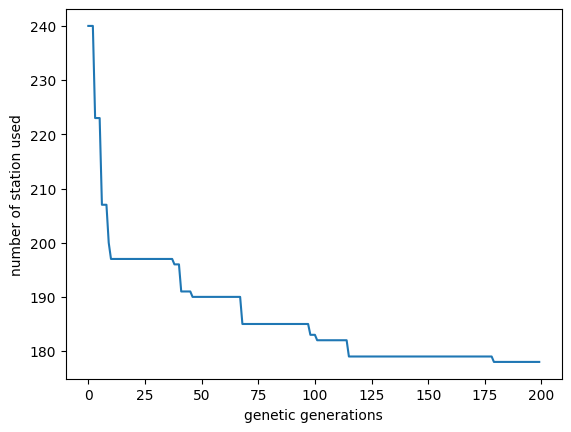

In [5]:
startStationID = stationIDs[0]
endStationID = stationIDs[0] #stationIDs[len(stationIDs)-1] #
generation = 200
population = len(stationIDs)

geneticAlgorithm = GeneticAlgorithm(
    data=stationIDs,
    startVerticesID=startStationID,
    endVerticesID=endStationID,
    graph=trainNetwork
)
trainedResult,trainingError = geneticAlgorithm.Train(generation,population)
if trainingError is not None: print(trainingError)

In [6]:
pd.DataFrame(trainedResult)

,id,context,distance
0,19,"[AG11, PY37, PY27, PY22, AG1, SP8, KG17, KJ9, ...",178
1,1,"[SP8, KG17, KJ9, PY21, AG1, AG6, AG7, SP4, KJ5...",179
2,17,"[PY22, SP14, KJ35, KJ19, KG33, KG34, AG11, PY2...",193
3,18,"[SP8, KG17, KJ9, PY21, KG33, KG34, AG6, AG7, K...",201
4,14,"[PY22, KJ9, PY27, PY37, AG11, KJ5, PY21, SP14,...",233
5,0,"[KJ35, KG17, KJ9, PY21, AG1, AG6, AG7, KG34, K...",234
6,12,"[KG34, PY27, AG1, AG11, KJ9, PY37, SP8, AG6, A...",235
7,4,"[PY27, PY22, KJ6, KG17, KJ9, AG7, SP4, AG6, SP...",236
8,9,"[PY22, AG11, PY27, KG33, AG1, SP8, KG17, KJ9, ...",238
9,13,"[AG6, KJ5, PY21, KG34, SP8, KJ9, AG1, KG33, KJ...",249


In [7]:
pd.DataFrame([trainNetwork.vertices.get(stationID) for stationID in [startStationID]+trainedResult[0].get("context")+[endStationID]])

,id,stationName,coordinate
0,AG16,Cempaka,"{'lat': '3.1383932', 'lon': '101.7530528'}"
1,AG11,Chan Sow Lin,"{'lat': '3.1278462', 'lon': '101.7155894'}"
2,PY37,Putra Permai,"{'lat': '2.98311', 'lon': '101.66058'}"
3,PY27,Kuchai,"{'lat': '3.08970', 'lon': '101.69428'}"
4,PY22,Conlay,"{'lat': '3.15049', 'lon': '101.71859'}"
5,AG1,Sentul Timur,"{'lat': '3.1859317', 'lon': '101.6953527'}"
6,SP8,Plaza Rakyat,"{'lat': '3.14405', 'lon': '101.7021'}"
7,KG17,Merdeka,"{'lat': '3.14208', 'lon': '101.70220'}"
8,KJ9,Ampang Park,"{'lat': '3.159854', 'lon': '101.7191364'}"
9,AG6,Bandaraya,"{'lat': '3.1555582', 'lon': '101.6944651'}"


In [8]:
stations = [startStationID, *trainedResult[0].get("context"), endStationID]

paths = []
for i in range(len(stations)):
    if i > 0:
        from_id = stations[i-1]
        to_id = stations[i]
        travelRes = trainNetwork.breadthFirstSearch(fromID=from_id,toID=to_id)
        if(travelRes.get("err")) : print(travelRes)
        paths.append(travelRes.get("res").get("path"))

# print({"from":stations[0],"to":stations[len(stations)-1]})
allPath = []
for path in paths:
    if len(allPath)>0: path.pop(0)
    allPath = [*allPath,*path]

# print(allPath)

In [9]:
pathData = [trainNetwork.vertices[stationID] for stationID in allPath]
df = pd.DataFrame(pathData)
df

,id,stationName,coordinate
0,AG16,Cempaka,"{'lat': '3.1383932', 'lon': '101.7530528'}"
1,AG15,Pandan Indah,"{'lat': '3.13472', 'lon': '101.74671'}"
2,AG14,Pandan Jaya,"{'lat': '3.13024', 'lon': '101.73896'}"
3,AG13,Maluri,"{'lat': '3.12336', 'lon': '101.72726'}"
4,AG12,Miharja,"{'lat': '3.1209905', 'lon': '101.7178829'}"
...,...,...,...
154,KG22,Maluri,"{'lat': '3.12444', 'lon': '101.72725'}"
155,AG13,Maluri,"{'lat': '3.12336', 'lon': '101.72726'}"
156,AG14,Pandan Jaya,"{'lat': '3.13024', 'lon': '101.73896'}"
157,AG15,Pandan Indah,"{'lat': '3.13472', 'lon': '101.74671'}"


In [10]:
from folium import folium , Marker, PolyLine, CircleMarker

locations = [
    {
        "location":[
            float(path_data.get("coordinate").get("lat")),
            float(path_data.get("coordinate").get("lon"))
        ],
        "popup":path_data.get("stationName")
    }
    for path_data in pathData
]

lat = 0
lon = 0
points = []
for loc in locations:
    lat += loc.get("location")[0]
    lon += loc.get("location")[1]
    points.append(loc.get("location"))
centrold = [lat/len(locations),lon/len(locations)]

Map =  folium.Map(location=centrold, zoom_start = 12)
PolyLine(points,color="red", weight=3.5, opacity=1).add_to(Map)

for loc in locations:
     CircleMarker(
        location=loc.get("location"),
        popup=loc.get("popup"),
        radius=3,
        color='red',
        fill=True,
        fill_color='red'
   ).add_to(Map)
        
for i in range(len(stations)):
    node = trainNetwork.vertices.get(stations[i])
    Marker(
        location=[
            float(node.get("coordinate").get("lat")),
            float(node.get("coordinate").get("lon"))
        ], 
        popup=f'{str(i+1)} - {node.get("stationName")}',
    ).add_to(Map)
    
     
Map